In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
import numpy as np
from arnie.pfunc import pfunc
from arnie.free_energy import free_energy
from arnie.bpps import bpps
from arnie.mfe import mfe
import arnie.utils as utils
from decimal import Decimal

Populating the interactive namespace from numpy and matplotlib


In [3]:
sequence  = "GCAAAAGC"
structure = "((....))"
print free_energy( sequence, package='nupack',constraint=structure)
structure = "xxxxxxxx"
print free_energy( sequence, package='nupack',constraint=structure)

-0.382660936
-0.382660936


In [103]:
def get_dG_closure(motif,verbose=False,package='vienna_2',loop_nt = 'U',cap_loop="UUUU",stem=["C","G"]):
    sequence = ""
    structure = ""
    assert(len(stem[0])==len(stem[1]))
    for (i,L) in enumerate(motif):
        sequence  += loop_nt*L
        structure += "."*L
        if i < len(motif)-1: 
            sequence  += stem[0] + cap_loop + stem[1]
            structure += "("*len(stem[0]) + ("x"*len(cap_loop)) + ")"*len(stem[1])
            
    dG = free_energy( sequence, package=package,constraint=structure)
    if verbose:
        print sequence
        print structure
        print dG
        print
        
    sequence_open  = stem[1]+sequence+stem[0]
    structure_open = "x"*len(stem[1])+structure+"x"*len(stem[0]) 
    dG_open = free_energy( sequence_open, package=package,constraint=structure_open)

    if verbose:
        print sequence_open
        print structure_open
        print dG_open
        print
        
    sequence_closed  = stem[1]+sequence+stem[0]
    structure_closed = "("*len(stem[0])+structure+")"*len(stem[1])
    dG_closed = free_energy( sequence_closed, package=package,constraint=structure_closed)    
    if verbose:
        print sequence_closed
        print structure_closed
        print dG_closed
        
    sequence_ref  = stem[0] + cap_loop + stem[1]
    structure_ref = "("*len(stem[0]) + ("x"*len(cap_loop)) + ")"*len(stem[1])
    dG_ref = free_energy( sequence_ref, package=package,constraint=structure_ref)    
    if verbose:
        print
        print sequence_ref
        print structure_ref
        print dG_ref

    dG_closure = dG_closed - dG_open - dG_ref
    
    if verbose:
        print
        print dG_closure
    return dG_closure


In [108]:
motif = [5,5,5,5]
dG_closure = get_dG_closure(motif,verbose=True,package='vienna_2',cap_loop="UUUU",stem=["C","G"])

UUUUUCUUUUGUUUUUCUUUUGUUUUUCUUUUGUUUUU
.....(xxxx).....(xxxx).....(xxxx).....
8.4

GUUUUUCUUUUGUUUUUCUUUUGUUUUUCUUUUGUUUUUC
x.....(xxxx).....(xxxx).....(xxxx).....x
8.4

GUUUUUCUUUUGUUUUUCUUUUGUUUUUCUUUUGUUUUUC
(.....(xxxx).....(xxxx).....(xxxx).....)
13.4

CUUUUG
(xxxx)
3.5

1.5


In [6]:
lines = open( 'NN_C_eff_toyfold3.csv').readlines()
print( len( lines ))

163


In [62]:
motif_tags = []
motifs = []
C_eff_toyfold = []
C_eff_err_toyfold = []
for line in lines[1:]:
    cols = line.split(',')
    motif_tags.append( cols[0])
    motif = [int(x) for x in cols[0].split('-')]
    print motif
    motifs.append( motif )
    C_eff_toyfold.append( float(cols[1]) )
    C_eff_err_toyfold.append( float(cols[2]) )

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[0, 0]
[0, 1]
[1, 0]
[0, 2]
[1, 1]
[2, 0]
[0, 3]
[1, 2]
[2, 1]
[3, 0]
[0, 4]
[1, 3]
[2, 2]
[3, 1]
[4, 0]
[0, 5]
[1, 4]
[2, 3]
[3, 2]
[4, 1]
[5, 0]
[0, 6]
[1, 5]
[2, 4]
[3, 3]
[4, 2]
[5, 1]
[6, 0]
[0, 7]
[1, 6]
[2, 5]
[3, 4]
[4, 3]
[5, 2]
[6, 1]
[7, 0]
[0, 8]
[1, 7]
[2, 6]
[3, 5]
[4, 4]
[5, 3]
[6, 2]
[7, 1]
[8, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 2]
[1, 0, 1]
[0, 0, 3]
[1, 0, 2]
[2, 0, 1]
[1, 1, 1]
[0, 0, 4]
[1, 0, 3]
[2, 0, 2]
[3, 0, 1]
[1, 1, 2]
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 0, 2]
[1, 0, 0, 1]
[0, 1, 0, 1]
[0, 0, 0, 3]
[1, 0, 0, 2]
[2, 0, 0, 1]
[0, 1, 0, 2]
[1, 1, 0, 1]
[0, 0, 0, 4]
[1, 0, 0, 3]
[2, 0, 0, 2]
[3, 0, 0, 1]
[0, 1, 0, 3]
[1, 1, 0, 2]
[2, 1, 0, 1]
[0, 2, 0, 2]
[1, 2, 0, 1]
[1, 1, 1, 1]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 2]
[1, 0, 0, 0, 1]
[0, 1, 0, 0, 1]
[0, 0, 0, 0, 3]
[1, 0, 0, 0, 2]
[2, 0, 0, 0, 1]
[0, 1, 0, 0, 2]
[1, 1, 0, 0, 1]
[0, 2, 0, 0, 1]
[1, 0, 1, 0, 1]
[0, 0, 0, 0,

In [117]:
dG_closure_contrafold2_A = []
dG_closure_contrafold2_G = []
dG_closure_contrafold2_C = []
dG_closure_contrafold2_U = []
dG_closure_vienna2_A = []
dG_closure_vienna2_G = []
dG_closure_vienna2_C = []
dG_closure_vienna2_U = []
for i,motif in enumerate(motifs):
    #print motif
    #dG_closure_vienna2[i] = get_dG_closure( motif, package='vienna_2')
    dG_closure_contrafold2_A.append( get_dG_closure( motif, package='contrafold_2',loop_nt = 'A') )
    dG_closure_contrafold2_G.append( get_dG_closure( motif, package='contrafold_2',loop_nt = 'G') )
    dG_closure_contrafold2_C.append( get_dG_closure( motif, package='contrafold_2',loop_nt = 'C') )
    dG_closure_contrafold2_U.append( get_dG_closure( motif, package='contrafold_2',loop_nt = 'U') )
    try:
        dG_closure_vienna2_A.append( get_dG_closure( motif, package='vienna_2',loop_nt = 'A') )
        dG_closure_vienna2_G.append( get_dG_closure( motif, package='vienna_2',loop_nt = 'G') )
        dG_closure_vienna2_C.append( get_dG_closure( motif, package='vienna_2',loop_nt = 'C') )
        dG_closure_vienna2_U.append( get_dG_closure( motif, package='vienna_2',loop_nt = 'U') )
    except:
        dG_closure_vienna2_A.append(NaN)
        dG_closure_vienna2_G.append(NaN)
        dG_closure_vienna2_C.append(NaN)
        dG_closure_vienna2_U.append(NaN)
    

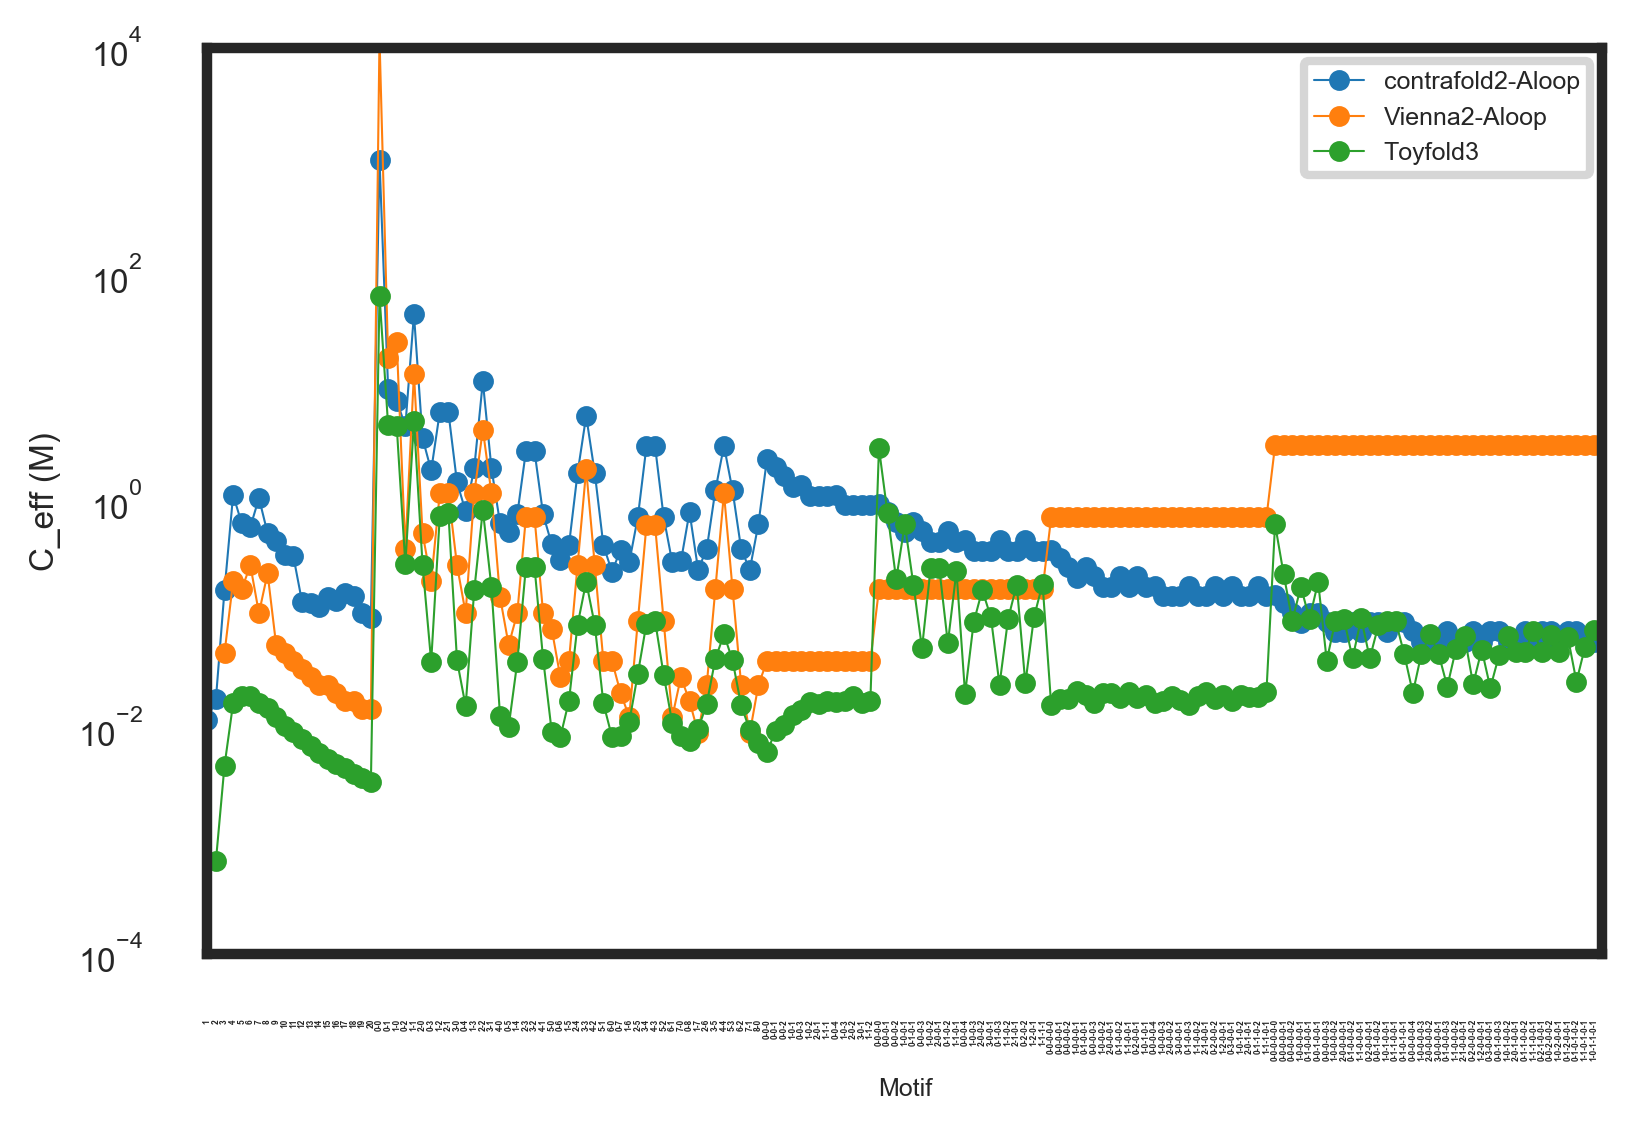

In [127]:
import matplotlib.pyplot as plt
dG_offset = 0; # Reference C_eff is NNNN tetraloop
kT = 0.001985875 * (273.15+37)
plt.figure(dpi=300)
plt.rcParams.update({'font.size': 6})
#plt.plot( exp(-(np.array(dG_closure_contrafold2_U)-(dG_offset/kT))),'o-',markersize=4,linewidth=0.5 )
plt.plot( exp(-(np.array(dG_closure_contrafold2_A)-(dG_offset/kT))),'o-',markersize=4,linewidth=0.5 )
#plt.plot( exp(-(np.array(dG_closure_contrafold2_C)-(dG_offset/kT))),'o-',markersize=4,linewidth=0.5 )
#plt.plot( exp(-(np.array(dG_closure_contrafold2_G)-(dG_offset/kT))),'o-',markersize=4,linewidth=0.5 )
#plt.plot( exp(-(np.array(dG_closure_vienna2_U)-dG_offset)/kT),'o-',markersize=4,linewidth=0.5 )
plt.plot( exp(-(np.array(dG_closure_vienna2_A)-dG_offset)/kT),'o-',markersize=4,linewidth=0.5 )
#plt.plot( exp(-(np.array(dG_closure_vienna2_C)-dG_offset)/kT),'o-',markersize=4,linewidth=0.5 )
#plt.plot( exp(-(np.array(dG_closure_vienna2_G)-dG_offset)/kT),'o-',markersize=4,linewidth=0.5 )
plt.plot(  C_eff_toyfold,'o-',markersize=4,linewidth=0.5 )
#plt.legend(['contrafold2-Uloop','contrafold2-Aloop','contrafold2-Cloop','Vienna2-Uloop','Toyfold3'],fontsize=6)
plt.legend(['contrafold2-Aloop','Vienna2-Aloop','Toyfold3'],fontsize=6)
plt.xticks(arange(len(motifs)));
plt.yticks(fontsize=8)
plt.yscale( 'log' )
ax = plt.gca()
ax.set_xticklabels(motif_tags,rotation=90,fontsize=2,fontweight='bold');
#ax.set_yticklabels( fontsize=6);
plt.xlabel( 'Motif',fontsize=6);
plt.ylabel('C_eff (M)',fontsize=8);
plt.ylim([1e-4,1e4]);
plt.xlim([0, len(motifs)]);